In [1]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
%load_ext autoreload
%autoreload 2

## build dataset

### normal dataset

In [3]:
import dataset

In [ ]:
df_dataset = dataset.build_normal_dataframe(numpy_output_file='fulldata.npy', dataframe_output_file='df_cohort')

### autoencoded dataset

In [52]:
import dataset
np_dataset = dataset.build_autoencoded_data_matrix(numpy_output_file='autoencoded_fulldata.npy')

Writing AutoEncoder training data to data/autoencoder_training_data.npy
autoencoder training data (with y=0) was saved to data/autoencoder_training_data.npy
dataset length = 54871 num features = 1440
Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=1440, out_features=720, bias=True)
    (1): Dropout(p=0.1, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=720, out_features=256, bias=True)
    (4): ReLU()
    (5): Linear(in_features=256, out_features=128, bias=True)
    (6): Tanh()
  )
  (decoder): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): Tanh()
    (2): Linear(in_features=256, out_features=720, bias=True)
    (3): ReLU()
    (4): Linear(in_features=720, out_features=1440, bias=True)
    (5): ReLU()
  )
)
..........Trained AutoEncoder. Training Data Loss Reached: 0.022058606147766113 
df_labels: (6464, 2)
cohort dataset: (6391, 1441)
cohort data saved to data/raw_cohort_data.npy
Created cohort dataset: (6391, 1441)
Writ

## baseline model: train and evaluate

## MLP: train and evaluate

### normal dataset

100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


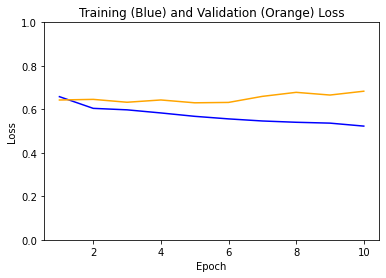

              precision    recall  f1-score   support

           0     0.7813    0.6521    0.7109       411
           1     0.5185    0.6725    0.5856       229

    accuracy                         0.6594       640
   macro avg     0.6499    0.6623    0.6482       640
weighted avg     0.6873    0.6594    0.6660       640


TN: 268 FP: 143 FN: 75 TP: 154

No Skill: ROC AUC=0.500
MLP: ROC AUC=0.720


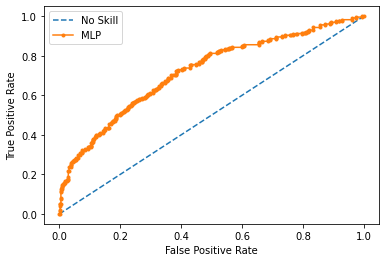


MLP: f1=0.586 auc=0.614


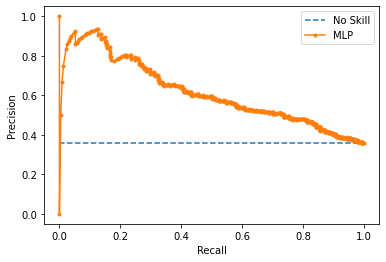

In [6]:
import MLP
import numpy as np

# Load data
df_dataset = np.load('data/fulldata.npy')

# Train Model
MLPmodel = MLP.binary(dataset=df_dataset, n_epochs=10, nodes=[676, 338], batch_size = 128, upper_y_lim = 1, p = 0.5)

### autoencoded dataset

  0%|          | 0/10 [00:00<?, ?it/s]

torch.Size([5112, 128])


100%|██████████| 10/10 [00:02<00:00,  5.00it/s]


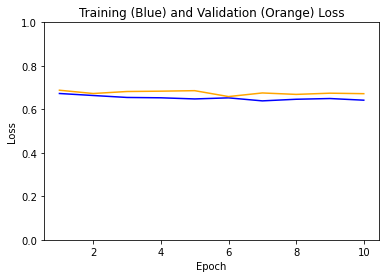

              precision    recall  f1-score   support

           0     0.7206    0.6414    0.6787       382
           1     0.5433    0.6318    0.5842       258

    accuracy                         0.6375       640
   macro avg     0.6320    0.6366    0.6314       640
weighted avg     0.6491    0.6375    0.6406       640


TN: 245 FP: 137 FN: 95 TP: 163

No Skill: ROC AUC=0.500
MLP: ROC AUC=0.679


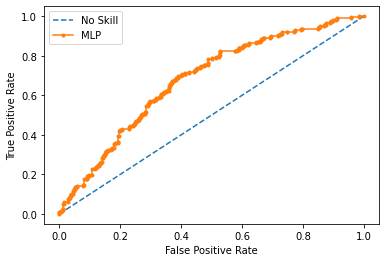


MLP: f1=0.584 auc=0.550


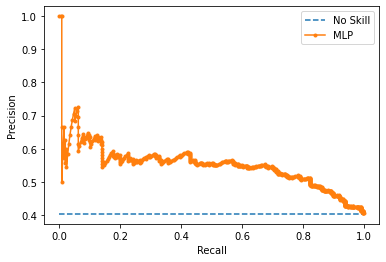

In [54]:
import MLP
import numpy as np

# Load data
df_dataset = np.load('data/autoencoded_fulldata.npy')

# Train Model
MLPmodel = MLP.binary(dataset=df_dataset, n_epochs=10, nodes=[128, 64], # [676, 338],
                      batch_size = 128, upper_y_lim = 1, p = 0.2)